**Import modules**

In [1]:
import konlpy
from konlpy.tag import Hannanum, Kkma, Komoran
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import re

**Define Function**

In [2]:
# data load
def read_speech(path):
    with open(path, 'rb') as f:
        speech = ""
        while True:
            line = f.readline().decode('utf-8')
            speech += line
            if not line:
                break
    return speech


# sentence split
def sentence_split(x):
    x = re.sub("\n+", ' ', x)
    x = re.sub("\s+", ' ', x)
    x = x.split('. ')
    x = [s + '.' for s in x]
    x[-1] = x[-1][:-1]
    return x


# extract nouns
def extract_nouns(inputs):
    nouns = [han.nouns(x) for x in inputs]
    nouns = sum(nouns, [])
    nouns = [n for n in nouns if len(n) > 1]
    return nouns

**Load data**

In [3]:
# load speech president Park & Moon
s_park = read_speech("Y:/1. 프로젝트/2019_한화시스템교육/교육자료_ML/5일차_텍스트마이닝/TM1/examples/speech_Park.txt")
s_moon = read_speech("Y:/1. 프로젝트/2019_한화시스템교육/교육자료_ML/5일차_텍스트마이닝/TM1/examples/speech_Moon.txt")

**Step1: sentence split**

In [4]:
s_park = sentence_split(s_park)
print(s_park)

['존경하는 국민여러분! 700만 해외동포 여러분! 저는 오늘 대한민국의 제18대 대통령에 취임하면서 희망의 새 시대를 열겠다는 각오로 이 자리에 섰습니다.', '저에게 이런 막중한 시대적 소명을 맡겨주신 국민 여러분께 깊이 감사드리며, 이 자리에 참석해주신 이명박 대통령과 전직 대통령, 그리고 세계 각국의 경축사절과 내외 귀빈 여러분께도 감사드립니다.', '저는 대한민국의 대통령으로서 국민 여러분의 뜻에 부응하여 경제부흥과 국민행복, 문화융성을 이뤄낼 것입니다.', '부강하고, 국민 모두가 함께 행복한 대한민국을 만드는 데 저의 모든 것을 바치겠습니다.', '국민여러분! 오늘의 대한민국은 국민의 노력과 피와 땀으로 이룩된 것입니다.', '하면 된다는 국민들의 강한 의지와 저력이 산업화와 민주화를 동시에 이룬 위대한 성취의 역사를 만들었습니다.', '한강의 기적으로 불리는 우리의 역사는 독일의 광산에서, 열사의 중동 사막에서, 밤새 불이 꺼지지 않은 공장과 연구실에서, 그리고 영하 수십도의 최전방 전선에서 가족과 조국을 위해 헌신하신 위대한 우리 국민들이 계셔서 가능했습니다.', '저는 오늘의 대한민국을 만드신 모든 우리 국민들께 진심으로 경의를 표합니다.', '존경하는 국민 여러분! 격동의 현대사 속에서 수많은 고난과 역경을 극복해 온 우리 앞에 지금 글로벌 경제 위기와 북한의 핵무장 위협과 같은 안보위기가 이어지고 있습니다.', '글로벌 금융위기 이후 자본주의 역시 새로운 도전에 직면해 있습니다.', '이번 도전은 과거와는 달리 우리가 스스로 새로운 길을 개척해야만 극복해나갈 수 있습니다.', '새로운 길을 개척하는 것은 쉽지 않은 일입니다.', '그러나 저는 우리 대한민국의 국민을 믿습니다.', '역동적인 우리 국민의 강인함과 저력을 믿습니다.', '이제 자랑스런 우리 국민 여러분과 함께 희망의 새 시대, ‘제2의 한강의 기적’을 만드는 위대한 도전에 나서고자 합니다.', '국민 개개인의 행복의 크기가 국력의 크기가 되고, 그 국력을 모든 국민이 함께 향

In [5]:
s_moon = sentence_split(s_moon)
print(s_moon)

['존경하고 사랑하는 국민 여러분.', '감사합니다.', '국민 여러분의 위대한 선택에 머리 숙여 깊이 감사드립니다.', '저는 오늘 대한민국 제 19대 대통령으로서 새로운 대한민국을 향해 첫걸음을 내딛습니다.', '지금 제 두 어깨는 국민 여러분으로부터 부여받은 막중한 소명감으로 무겁습니다.', '지금 제 가슴은 한번도 경험하지 못한 나라를 만들겠다는 열정으로 뜨겁습니다.', '그리고 지금 제 머리는 통합과 공존의 새로운 세상을 열어갈 청사진으로 가득 차 있습니다.', '우리가 만들어가려는 새로운 대한민국은 숱한 좌절과 패배에도 불구하고 우리의 선대들이 일관되게 추구했던 나라입니다.', '또 많은 희생과 헌신을 감내하며 우리 젊은이들이 그토록 이루고 싶어 했던 나라입니다.', '그런 대한민국을 만들기 위해 저는 역사와 국민 앞에 두렵지만 겸허한 마음으로 대한민국 제 19대 대통령으로서의 책임과 소명을 다할 것임을 천명합니다.', '함께 선거를 치른 후보들께 감사의 말씀과 함께 심심한 위로를 전합니다.', '이번 선거에서는 승자도 패자도 없습니다.', '우리는 새로운 대한민국을 함께 이끌어가야 할 동반자입니다.', '이제 치열했던 경쟁의 순간을 뒤로하고 함께 손을 맞잡고 앞으로 전진해야 합니다.', '존경하는 국민 여러분, 지난 몇 달 우리는 유례없는 정치적 격변기를 보냈습니다.', '정치는 혼란스러웠지만 국민은 위대했습니다.', '현직 대통령의 탄핵과 구속 앞에서도 국민들이 대한민국의 앞길을 열어주셨습니다.', '우리 국민들은 좌절하지 않고 오히려 이를 전화위복으로 승화시켜 마침내 오늘 새로운 세상을 열었습니다.', '대한민국의 위대함은 국민의 위대함입니다.', '그리고 이번 대통령 선거에서 우리 국민들은 또 하나의 역사를 만들어주셨습니다.', '전국 각지에서 골고른 지지로 새로운 대통령을 선택해주셨습니다.', '오늘부터 저는 국민 모두의 대통령이 되겠습니다.', '저를 지지하지 않았던 국민 한분한분도 저의 국민이고, 우리의 국민으로 섬기겠습니다.', '저는

**Step3: POS tagging**

In [6]:
han = Hannanum()
kko = Kkma()
komo = Komoran()

In [7]:
han.pos(s_park[0])

[('존경', 'N'),
 ('하', 'X'),
 ('는', 'E'),
 ('국민여러분', 'N'),
 ('!', 'S'),
 ('700', 'N'),
 ('만', 'J'),
 ('해외동포', 'N'),
 ('여러분', 'N'),
 ('!', 'S'),
 ('저', 'N'),
 ('는', 'J'),
 ('오늘', 'N'),
 ('대한민국', 'N'),
 ('의', 'J'),
 ('제18대', 'N'),
 ('대통령', 'N'),
 ('에', 'J'),
 ('취임', 'N'),
 ('하', 'X'),
 ('면서', 'E'),
 ('희망', 'N'),
 ('의', 'J'),
 ('새', 'M'),
 ('시대', 'N'),
 ('를', 'J'),
 ('열', 'P'),
 ('겠다는', 'E'),
 ('각오', 'N'),
 ('로', 'J'),
 ('이', 'M'),
 ('자리', 'N'),
 ('에', 'J'),
 ('서', 'P'),
 ('었습니다', 'E'),
 ('.', 'S')]

In [8]:
kko.pos(s_park[0])

[('존경', 'NNG'),
 ('하', 'XSV'),
 ('는', 'ETD'),
 ('국민', 'NNG'),
 ('여러', 'MDT'),
 ('분', 'NNB'),
 ('!', 'SF'),
 ('700', 'NR'),
 ('만', 'JX'),
 ('해외', 'NNG'),
 ('동포', 'NNG'),
 ('여러', 'MDT'),
 ('분', 'NNB'),
 ('!', 'SF'),
 ('저', 'NP'),
 ('는', 'JX'),
 ('오늘', 'NNG'),
 ('대한민국', 'NNG'),
 ('의', 'JKG'),
 ('제', 'NNG'),
 ('18', 'NR'),
 ('대', 'NNM'),
 ('대통령', 'NNG'),
 ('에', 'JKM'),
 ('취임', 'NNG'),
 ('하', 'XSV'),
 ('면서', 'ECE'),
 ('희망', 'NNG'),
 ('의', 'JKG'),
 ('새', 'MDT'),
 ('시대', 'NNG'),
 ('를', 'JKO'),
 ('열', 'VV'),
 ('겠', 'EPT'),
 ('다는', 'ETD'),
 ('각오', 'NNG'),
 ('로', 'JKM'),
 ('이', 'MDT'),
 ('자리', 'NNG'),
 ('에', 'JKM'),
 ('서', 'VV'),
 ('었', 'EPT'),
 ('습니다', 'EFN'),
 ('.', 'SF')]

In [9]:
komo.pos(s_park[0])

[('존경', 'NNG'),
 ('하', 'XSV'),
 ('는', 'ETM'),
 ('국민', 'NNG'),
 ('여러분', 'NNP'),
 ('!', 'SF'),
 ('700', 'SN'),
 ('만', 'NR'),
 ('해외', 'NNG'),
 ('동포', 'NNG'),
 ('여러분', 'NNP'),
 ('!', 'SF'),
 ('저', 'NP'),
 ('는', 'JX'),
 ('오늘', 'NNG'),
 ('대한민국', 'NNP'),
 ('의', 'JKG'),
 ('제', 'XPN'),
 ('18', 'SN'),
 ('대', 'NNB'),
 ('대통령', 'NNG'),
 ('에', 'JKB'),
 ('취임', 'NNG'),
 ('하', 'XSV'),
 ('면서', 'EC'),
 ('희망', 'NNG'),
 ('의', 'JKG'),
 ('새 시대', 'NNP'),
 ('를', 'JKO'),
 ('열', 'VV'),
 ('겠', 'EP'),
 ('다는', 'ETM'),
 ('각오', 'NNG'),
 ('로', 'JKB'),
 ('이', 'MM'),
 ('자리', 'NNG'),
 ('에', 'JKB'),
 ('서', 'VV'),
 ('었', 'EP'),
 ('습니다', 'EF'),
 ('.', 'SF')]

**Step4: plotting**

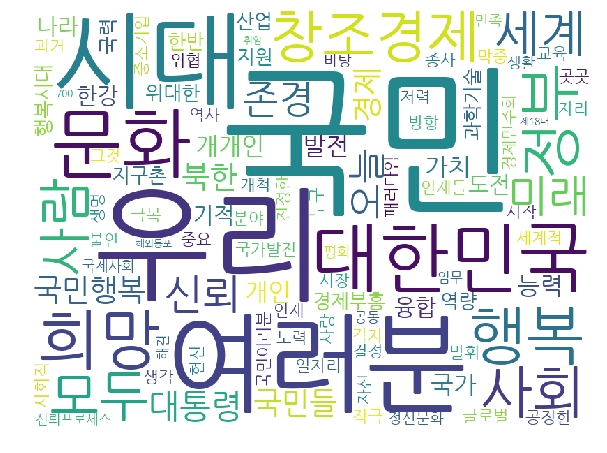

In [10]:
# word cloud for Park
s_park_noun = extract_nouns(s_park)
count = Counter(s_park_noun)
tags = count.most_common(100)
# WordCloud, matplotlib: 단어 구름 그리기
font_path = "C:/WINDOWS/Fonts/NANUMGOTHIC.TTF"
wc = WordCloud(font_path=font_path, background_color='white', width=800, height=600)
cloud = wc.generate_from_frequencies(dict(tags))
plt.figure(figsize=(10,8))
plt.axis('off')
plt.imshow(cloud)
plt.savefig('park.png', dpi=600)
plt.show()

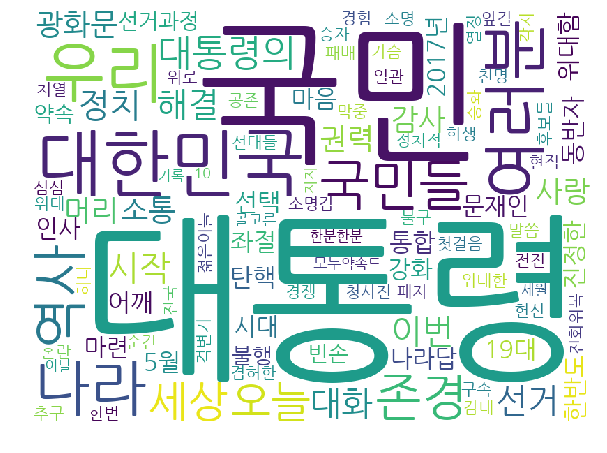

In [11]:
# word cloud for Moon
s_moon_noun = extract_nouns(s_moon)
count = Counter(s_moon_noun)
tags = count.most_common(100)
# WordCloud, matplotlib: 단어 구름 그리기
font_path = "C:/WINDOWS/Fonts/NANUMGOTHIC.TTF"
wc = WordCloud(font_path=font_path, background_color='white', width=800, height=600)
cloud = wc.generate_from_frequencies(dict(tags))
plt.figure(figsize=(10,8))
plt.axis('off')
plt.imshow(cloud)
plt.savefig('moon.png', dpi=600)
plt.show()